<a href="https://colab.research.google.com/github/HenryZumaeta/py4cd_EPC2025/blob/main/C12/C12_Script01_EDAEspacioTemporal_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Creamos un directorio oculto y un archivo dentro de ese directorio oculto
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json
# Creamo un diccionario para almacenar el usuario de nuestra cuenta en kaggle y la
# correspondiente token
api_token = {"username":"xxxxxx","key":"xxxxxx"}
# Mandamos el diccionario api_token a disco duro (kaggle.json)
import json
with open("/root/.kaggle/kaggle.json", "w") as file:
  json.dump(api_token, file)
# Permisos
!chmod 600 ~/.kaggle/kaggle.json
# Descarguemos y descomprimimos un dataset :
!kaggle datasets download robintux/crime-data-from-2020-to-present-19112025 --unzip
# Modulos y datos
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Datos temporales
from datetime import datetime

crime_la = pd.read_csv("crime_los_angeles.csv")
# crime_la.drop("Unnamed: 0", axis = 1,inplace=True)
crime_la = crime_la.drop("Unnamed: 0", axis = 1)

crime_la.info()

Dataset URL: https://www.kaggle.com/datasets/robintux/crime-data-from-2020-to-present-19112025
License(s): apache-2.0
  0% 0.00/52.9M [00:00<?, ?B/s]
100% 52.9M/52.9M [00:00<00:00, 817MB/s]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004991 entries, 0 to 1004990
Data columns (total 28 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   dr_no           1004991 non-null  int64  
 1   date_rptd       1004991 non-null  object 
 2   date_occ        1004991 non-null  object 
 3   time_occ        1004991 non-null  int64  
 4   area            1004991 non-null  int64  
 5   area_name       1004991 non-null  object 
 6   rpt_dist_no     1004991 non-null  int64  
 7   part_1_2        1004991 non-null  int64  
 8   crm_cd          1004991 non-null  int64  
 9   crm_cd_desc     1004991 non-null  object 
 10  mocodes         853372 non-null   object 
 11  vict_age        1004991 non-null  int64  
 12  vict_sex        860347 non-null   

# Análisis de variables temporales
- date_occ
- time_occ

In [3]:
# crime_la["date_occ"]
pd.to_datetime(crime_la["date_occ"], errors="coerce")

,date_occ
0,2020-11-07
1,2020-10-18
2,2020-10-30
3,2020-12-24
4,2020-09-29
...,...
1004986,2025-02-02
1004987,2025-02-18
1004988,2025-01-30
1004989,2025-01-17


In [6]:
# crime_la["time_occ"]
# Para que cada uno tenga 4 caracteres, reemplace con 0.
crime_la["time_occ"].astype(str).str.zfill(4)

,time_occ
0,0845
1,1845
2,1240
3,1310
4,1830
...,...
1004986,0130
1004987,1000
1004988,1554
1004989,1600


In [9]:
# Limpieza y preprocesamiento de variables temporales

# Convertir la columna date_occ a un dato de tipo datetime
crime_la["date_occ"] = pd.to_datetime(crime_la["date_occ"], errors="coerce")

# Procesar time_occ suele ser un valor con 4 dígitos enteros
crime_la["time_occ"] = crime_la["time_occ"].astype(str).str.zfill(4)

# La hora del evento está representada por los dos primeros caracteres de time_occ
# Creamos la nueva columna "hour"
crime_la["hour"] = pd.to_numeric(crime_la["time_occ"].str[:2], errors = "coerce")

In [12]:
# Validemos los posibles valores de la columna hour
np.sort(crime_la["hour"].unique())

# Como una póliza de segura, podemos filtrar horas válidas (0-23)
crime_la = crime_la[(crime_la["hour"] >= 0) & (crime_la["hour"] <= 23)]

# Eliminar filas con valores faltantes
crime_temp = crime_la.dropna(subset = ["date_occ", "hour"]).copy()

# Información
print(f"Registros válidos {len(crime_temp)}")
print(f"Rango de fechas {crime_temp['date_occ'].min()} → {crime_temp['date_occ'].max()}")

Registros válidos 1004991
Rango de fechas 2020-01-01 00:00:00 → 2025-05-29 00:00:00


In [13]:
# Creación de nuevas variables: Crear componentes temporales

crime_temp["year"] = crime_temp["date_occ"].dt.year
crime_temp["month"] = crime_temp["date_occ"].dt.month
crime_temp["day_of_week"] = crime_temp["date_occ"].dt.dayofweek
crime_temp["day_name"] = crime_temp["date_occ"].dt.day_name()
crime_temp["is_weekend"] = crime_temp["day_of_week"].isin([5,6])

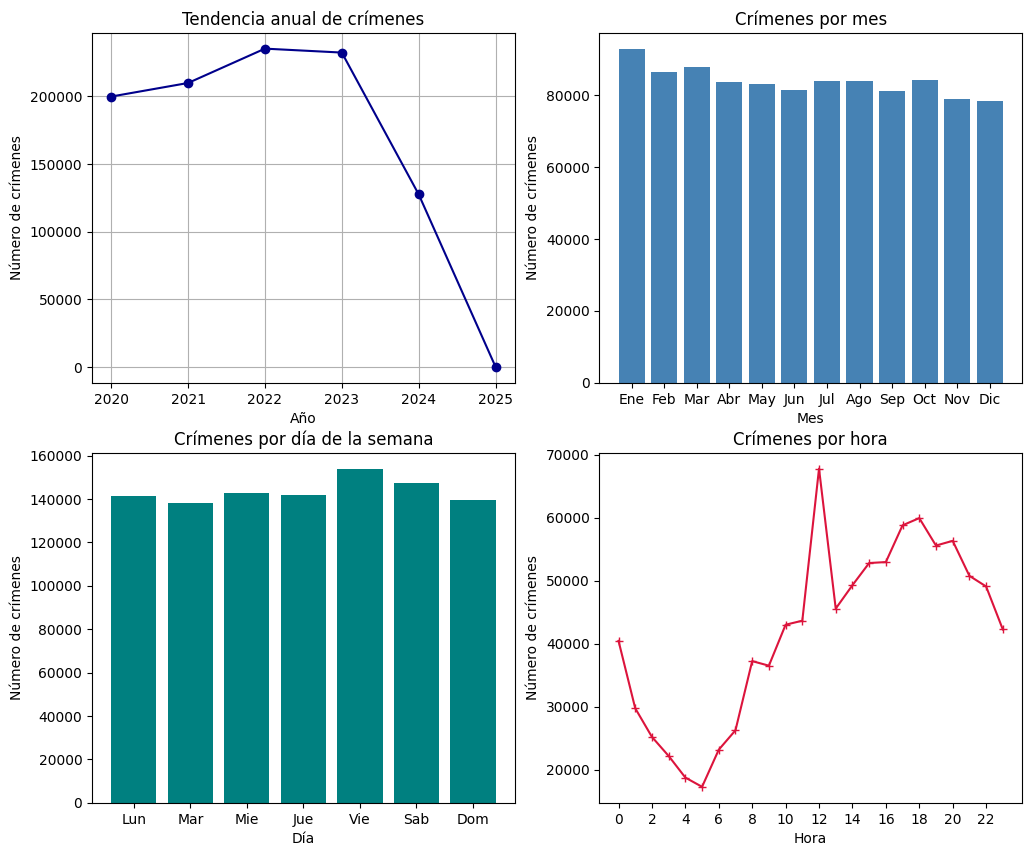

<Figure size 640x480 with 0 Axes>

In [29]:
# Visualiazación con datos temporales
# Mostremos información de tendencias anuales, estacionales mensuales, patrones diarios y patrón horario
# Creamos una matriz de 2x2

# Crear la configuración para un subplots de 2x2
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(12,10))

# Primer gráfico: Mostrar la tendencia anual
annual = crime_temp["year"].value_counts().sort_index()
axes[0,0].plot(annual.index, annual.values, marker = "o", color = "darkblue")
axes[0,0].set_title("Tendencia anual de crímenes")
axes[0,0].set_xlabel("Año")
axes[0,0].set_ylabel("Número de crímenes")
axes[0,0].grid(True)

# Segundo gráfico: Estacionariedad Mensual
monthly = crime_temp["month"].value_counts().sort_index()
axes[0,1].bar(monthly.index, monthly.values, color = "steelblue")
axes[0,1].set_title("Crímenes por mes")
axes[0,1].set_xlabel("Mes")
axes[0,1].set_ylabel("Número de crímenes")
axes[0,1].set_xticks(range(1,13))
axes[0,1].set_xticklabels(
    "Ene Feb Mar Abr May Jun Jul Ago Sep Oct Nov Dic".split()
)

# Tercer gráfico: Patrón diario por día de la semana
daily = crime_temp["day_of_week"].value_counts().sort_index()
axes[1,0].bar(daily.index, daily.values, color = "teal")
axes[1,0].set_title("Crímenes por día de la semana")
axes[1,0].set_xlabel("Día")
axes[1,0].set_ylabel("Número de crímenes")
axes[1,0].set_xticks(range(7))
axes[1,0].set_xticklabels(
    "Lun Mar Mie Jue Vie Sab Dom".split()
)

# Cuarto gráfico: Horario
hourly = crime_temp["hour"].value_counts().sort_index()
axes[1,1].plot(hourly.index, hourly.values, marker = "+", color = "crimson")
axes[1,1].set_title("Crímenes por hora")
axes[1,1].set_xlabel("Hora")
axes[1,1].set_ylabel("Número de crímenes")
axes[1,1].set_xticks(range(0,24,2))
axes[1,1].set_xticklabels(range(0,24,2))

# Fin
plt.show()
plt.tight_layout()

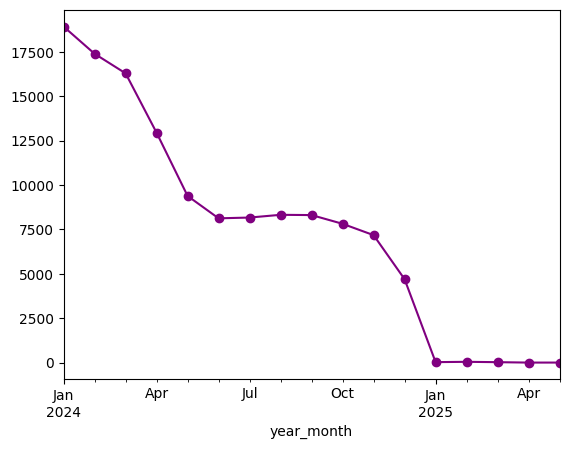

In [31]:
# Análisis: Tendencia reciente (desde el primero de enero del 2024)

recent = crime_temp[crime_temp["date_occ"] >= "2024-01-01"].copy()

# Verifiquemos que recent tiene valores (diferente del vacío)
if not recent.empty:
    recent["year_month"] = recent["date_occ"].dt.to_period("M")
    trend = recent.groupby("year_month").size()
    trend.plot(kind = "line", marker = "o", color = "purple")


# Análisis Espacio-Temporal

In [32]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import folium
#
from folium.plugins import HeatMapWithTime
#
crime_la.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004991 entries, 0 to 1004990
Data columns (total 29 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   dr_no           1004991 non-null  int64         
 1   date_rptd       1004991 non-null  object        
 2   date_occ        1004991 non-null  datetime64[ns]
 3   time_occ        1004991 non-null  object        
 4   area            1004991 non-null  int64         
 5   area_name       1004991 non-null  object        
 6   rpt_dist_no     1004991 non-null  int64         
 7   part_1_2        1004991 non-null  int64         
 8   crm_cd          1004991 non-null  int64         
 9   crm_cd_desc     1004991 non-null  object        
 10  mocodes         853372 non-null   object        
 11  vict_age        1004991 non-null  int64         
 12  vict_sex        860347 non-null   object        
 13  vict_descent    860335 non-null   object        
 14  premis_cd       10

In [34]:
# Filtramos datos válidos: Las columnas con información temporal y espacial, no deben tener valores faltantes
df = crime_la.dropna(subset=["lat", "lon", "hour", "date_occ"]).copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004991 entries, 0 to 1004990
Data columns (total 29 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   dr_no           1004991 non-null  int64         
 1   date_rptd       1004991 non-null  object        
 2   date_occ        1004991 non-null  datetime64[ns]
 3   time_occ        1004991 non-null  object        
 4   area            1004991 non-null  int64         
 5   area_name       1004991 non-null  object        
 6   rpt_dist_no     1004991 non-null  int64         
 7   part_1_2        1004991 non-null  int64         
 8   crm_cd          1004991 non-null  int64         
 9   crm_cd_desc     1004991 non-null  object        
 10  mocodes         853372 non-null   object        
 11  vict_age        1004991 non-null  int64         
 12  vict_sex        860347 non-null   object        
 13  vict_descent    860335 non-null   object        
 14  premis_cd       10

## Análisis por distrito y hora del día

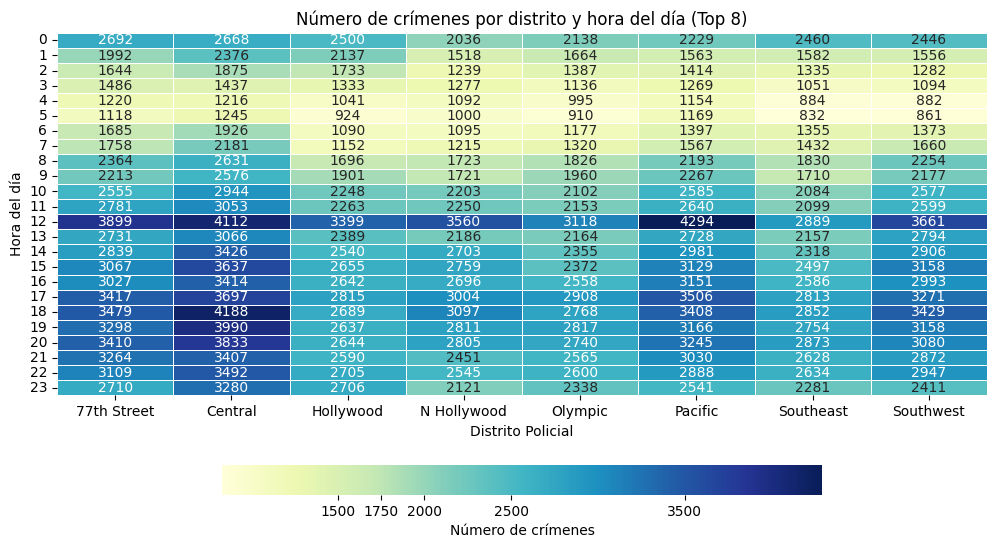

<Figure size 640x480 with 0 Axes>

In [60]:
# Top distritos con más crímenes

# Obtener los nombres de los distritos
top_areas = df["area_name"].value_counts().head(8).index

# Filtramos el dataframe con esos nombres de distritos
df_top = df[df["area_name"].isin(top_areas)]

# Pivot: Área vs Hora
heatmap_data = df_top.groupby(["area_name", "hour"]).size().unstack(fill_value=0)

# Visualización
plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data.T,
            # Cambiar el color de map
            cmap="YlGnBu",
            annot=True,
            fmt="d",
            linewidths=.5,
            # Definamos una etiqueta para la barra de color
            cbar_kws={
                "label": "Número de crímenes",
                "orientation": "horizontal",
                "fraction": 0.065,
                "ticks":[1500, 1750, 2000, 2500, 3500],
                "pad": 0.15
                }
            )

# Título
plt.title("Número de crímenes por distrito y hora del día (Top 8)")
plt.xlabel("Distrito Policial")
plt.ylabel("Hora del día")

# Fin
plt.show()
plt.tight_layout()

In [75]:
# Mapa de calor espacio-temporal interactivo (folium)

# Proceso de creación de df
df = crime_la.dropna(subset=["lat", "lon", "hour", "date_occ"]).copy()

# Seleccionamos una muestra de df
df = df.sample(frac=0.05)

# Agrupar puntos por hora
hourly_data = {}
for hour in range(24):
    # Latitud y Longitud para esa hora determinada
    subset = df[df["hour"] == hour][["lat", "lon"]].values.tolist()
    hourly_data[hour] = subset

# Ordenar la data por hora
ordered_data = [hourly_data[h] for h in sorted(hourly_data.keys())]

# Se debe crear una figura con el tamaño deseado
fig = folium.Figure(width=800, height=600)

# Creación del mapa
m = folium.Map(
    location=[34.0522, -118.2437],
    zoom_start=11
    ).add_to(fig)

# Agreguemos algunos marcadores: Primero definimos la informacion a agregar
locations = [
    {"location": [34.0522, -118.2437], "popup": "Centro de Los Ángeles"},
    {"location": [34.0700, -118.1531], "popup": "Downtown de Los Ángeles"}
]
# Colocamos el PIN o marcador
for loc in locations:
    folium.Marker(**loc).add_to(m)

# Agreguemos una capa HeatMapWithTime
HeatMapWithTime(
    data = ordered_data,
    index=[f"{h}:00" for h in range(24)],
    radius = 5
    ).add_to(m)

# Mostremos el mapa resultante
m

# Todos los mapas generados hasta el momento se pueden guardar en un html
m.save("mapa_calor_espacio_temporal_interactivo.html")

# La Arquitectura de `seaborn`

In [83]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [78]:
# Carguemos el dataset de propinas
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


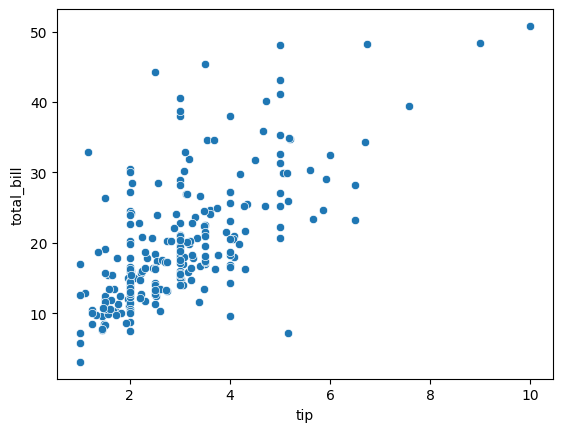

In [81]:
plot1 = sns.scatterplot(x = "tip", y = "total_bill", data = tips)

In [82]:
type(plot1)

matplotlib.axes._axes.Axes

<Axes: xlabel='tip', ylabel='total_bill'>

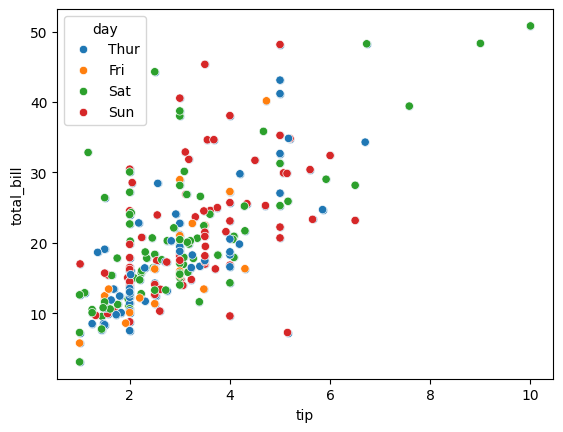

In [86]:
sns.scatterplot(x = "tip", y = "total_bill", data = tips)
sns.scatterplot(x = "tip", y = "total_bill", data = tips, hue = "day")

<Axes: xlabel='tip', ylabel='total_bill'>

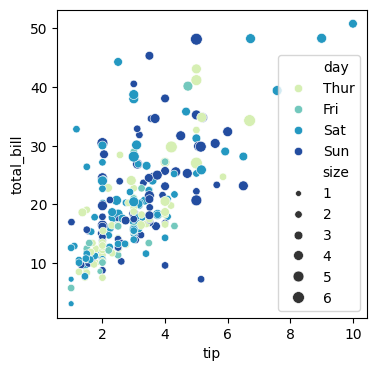

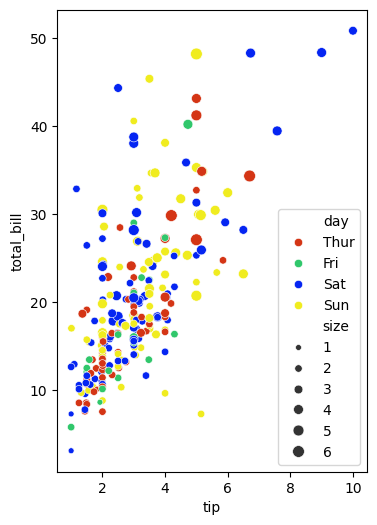

In [90]:
plt.figure(num = 1, figsize = (4,4))
sns.scatterplot(x = "tip", y = "total_bill", data = tips, hue = "day", size = "size", palette="YlGnBu")

plt.figure(num = 2, figsize = (4,6))
custom_color = ["#D43515", "#30C76B", "#0525F2", "#F0EC1F"]
sns.scatterplot(x = "tip", y = "total_bill", data = tips, hue = "day", size = "size", palette=custom_color)

Text(0.5, 1.0, 'Paleta de colores personalizada')

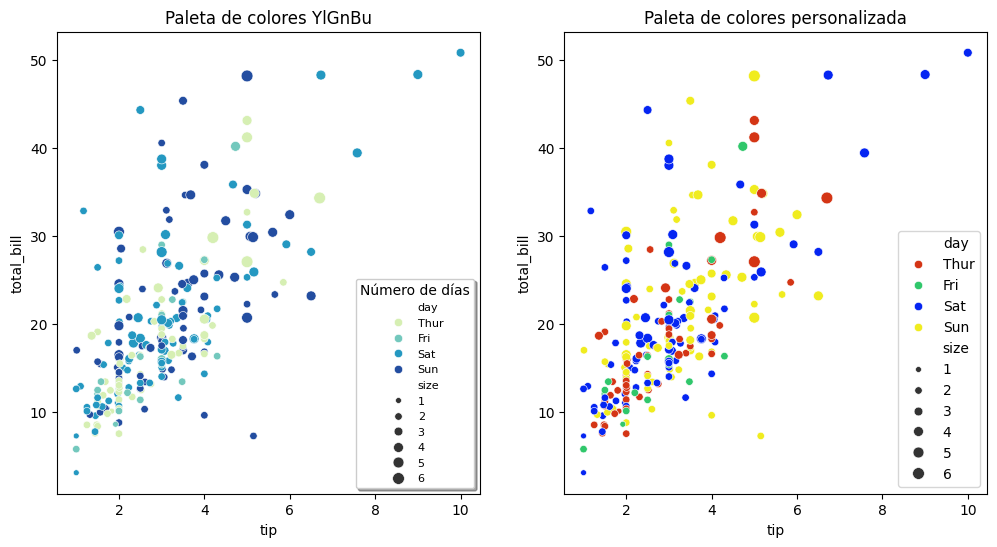

In [101]:
# Personalizamos la leyenda

# También podemos estructurar estos dos gráficos como una fila y dos columnas
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(12,6))

# Primer scatterplot
sns.scatterplot(x = "tip", y = "total_bill", data = tips, hue = "day", size = "size", palette="YlGnBu",
                ax = ax1)
ax1.set_title("Paleta de colores YlGnBu")
ax1.legend(title = "Número de días",
           title_fontsize = "10",
           fontsize = "8",
           loc = "lower right",
           frameon = True,
           fancybox = True,
           shadow = True)


# Segundo scatterplot
custom_color = ["#D43515", "#30C76B", "#0525F2", "#F0EC1F"]
sns.scatterplot(x = "tip", y = "total_bill", data = tips, hue = "day", size = "size", palette=custom_color,
                ax = ax2)
ax2.set_title("Paleta de colores personalizada")

Text(0.5, 1.0, 'Paleta de colores personalizada')

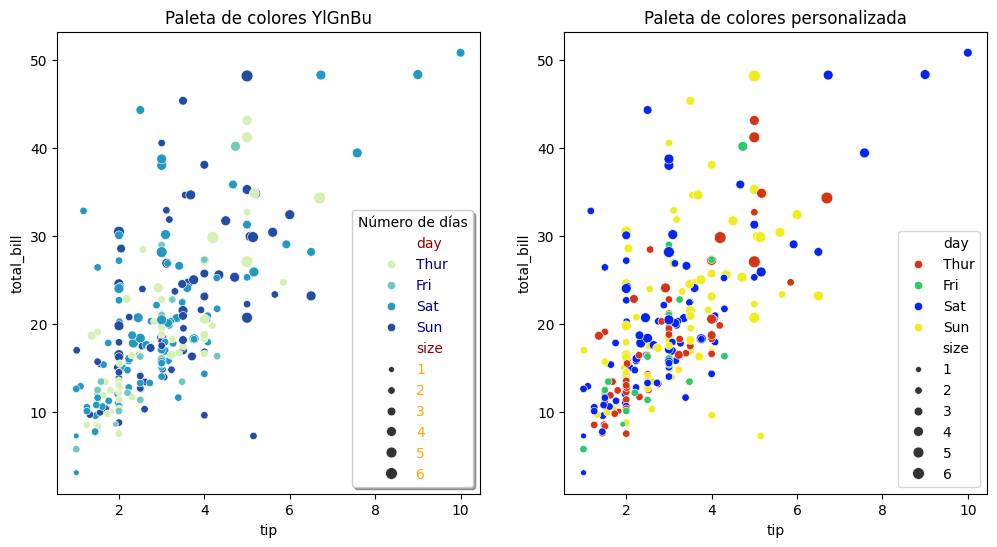

In [113]:
# Personalicemos los elementos que componen a cada componente de la leyenda

# También podemos estructurar estos dos gráficos como una fila y dos columnas
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(12,6))

# Primer scatterplot
sns.scatterplot(x = "tip", y = "total_bill", data = tips, hue = "day", size = "size", palette="YlGnBu",
                ax = ax1)
ax1.set_title("Paleta de colores YlGnBu")
legend_ax1 = ax1.legend(title = "Número de días",
           title_fontsize = "10",
           fontsize = "10",
           loc = "lower right",
           frameon = True,
           fancybox = True,
           shadow = True)

# Cambiemos elementos específicos de la leyenda
texts = legend_ax1.get_texts()
for i, text in enumerate(texts):
    # Modifiquemos a las etiquetas para el nombre del día
    if text.get_text() in tips.day.unique():
        text.set_color("darkblue")
    if text.get_text() in np.array(tips["size"].unique(), dtype = str):
        text.set_color("orange")
    if text.get_text() in ["day", "size"]:
        text.set_color("darkred")

# Segundo scatterplot
custom_color = ["#D43515", "#30C76B", "#0525F2", "#F0EC1F"]
sns.scatterplot(x = "tip", y = "total_bill", data = tips, hue = "day", size = "size", palette=custom_color,
                ax = ax2)
ax2.set_title("Paleta de colores personalizada")

In [108]:
legend_ax1.get_texts()[11]

Text(0, 0, '6')